In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Dropout # type: ignore
from tensorflow.keras.models import load_model # type: ignore
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, explained_variance_score
%matplotlib inline

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [6]:
x = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [9]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [14]:
model.fit(x = x_train, y = y_train, epochs= 600, validation_data=(x_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 21ms/step - loss: 0.6847 - val_loss: 0.6726
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6567 - val_loss: 0.6439
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6274 - val_loss: 0.6158
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5956 - val_loss: 0.5833
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5608 - val_loss: 0.5454
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5174 - val_loss: 0.5015
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4677 - val_loss: 0.4537
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4161 - val_loss: 0.4100
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3687 - val_loss: 0.3720
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3301 - val_loss: 0.3425
Epoch 11

<Axes: >

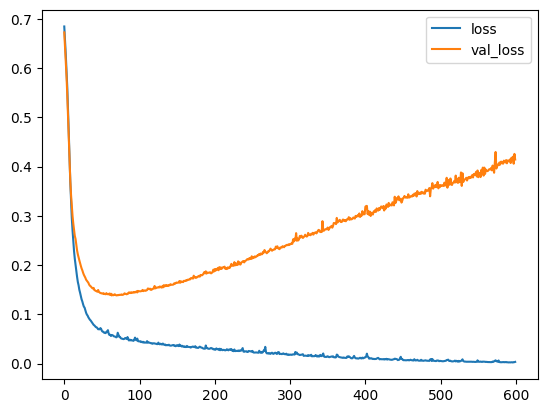

In [15]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [16]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience=25)

In [19]:
model.fit(x = x_train, y = y_train, epochs= 600, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.7036 - val_loss: 0.6660
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6580 - val_loss: 0.6316
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6163 - val_loss: 0.5857
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5673 - val_loss: 0.5413
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5174 - val_loss: 0.4927
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4645 - val_loss: 0.4425
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4115 - val_loss: 0.3929
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3584 - val_loss: 0.3493
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3148 - val_loss: 0.3141
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2784 - val_loss: 0.2868
Epoch 11

In [20]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.45))
model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.45))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [21]:
model.fit(x = x_train, y = y_train, epochs= 600, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 16ms/step - loss: 0.7365 - val_loss: 0.6836
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6947 - val_loss: 0.6724
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6825 - val_loss: 0.6572
Epoch 4/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6459 - val_loss: 0.6373
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6357 - val_loss: 0.6126
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6191 - val_loss: 0.5961
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6081 - val_loss: 0.5789
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5806 - val_loss: 0.5570
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5550 - val_loss: 0.5311
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5410 - val_loss: 0.4995
Epoch 11

<Axes: >

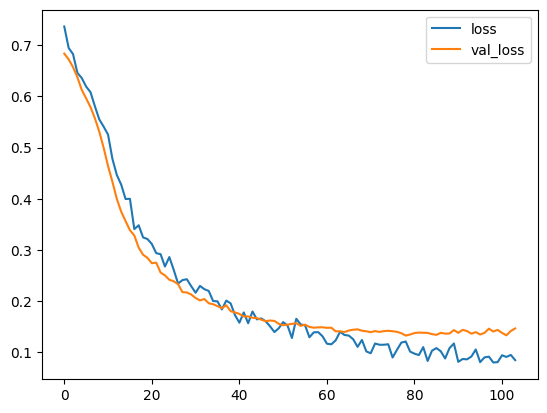

In [22]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [25]:
pred = (model.predict(x_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 3ms/step


In [26]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        58
           1       0.96      0.92      0.94        85

    accuracy                           0.93       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



In [27]:
print(confusion_matrix(y_test, pred))

[[55  3]
 [ 7 78]]
